# Introduction
* Kevin Taing kt26746
* Derek Chen dyc377
* Sam Lu
* Jack Holt jgh2772

Dataset in use: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/data

In this project, we aimed to evaluate the performance of a various model in predicting obesity levels using principal component analysis (PCA) for dimensionality reduction. The dataset contains various features related to individuals' lifestyles and health habits, including age, height, weight, food consumption patterns, and physical activity levels. The target variable is the obesity level, categorized into different classes.

Through various models, we attempted to find the best fit for our data and approach. We discovered that a neural network yielded the best accuracies. To evaluate the neural network model, we employed a pipeline that includes data preprocessing steps such as standard scaling and PCA for dimensionality reduction. We used the StandardScaler to standardize the features and PCA to reduce the dimensionality of the dataset while retaining 95% of the variance.

For the neural network model, we used the MLPClassifier from scikit-learn. The model was evaluated using 5-fold cross-validation to estimate its performance. We aimed to find the optimal number of principal components (n_components in PCA) that would maximize the model's accuracy.

To achieve this, we iterated over a range of n_components values from 0.81 to 1.00 with a step size of 0.01. For each n_components value, we calculated the average accuracy of the model using cross-validation. Finally, we plotted the accuracies against the n_components values to visualize the relationship and identify the optimal n_components value for the PCA.



In [50]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings

# Data Visualization

In this section, we wanted to just visualize all of of our original features to see possibilities there are
The features of our data include:
* gender
* age
* height
* weight
* overweight_fam_hist - if the individual has (a) family member(s) that suffered or suffers from being overweight
* f_high_caloric_food - if the individual frequent consumption of high caloric food
* f_vegetables* - frequency of the individual consuming vegetables
* num_meals - number of main meals that the individual eats per day
* food_between_meals - report on the frequency in which the individual eats between main meals
* smoke - if the individual smokes or not
* water_consumption* - frequency of the individual consuming water
* calorie_conscious - if the individual watches their calories
* f_activity* - frequency of the individual having physical activity
* time_on_tech* - frequency of the individual using technology
* alcohol - report on the frequency in which the consumes alcohol
* transportation - main mode of transportation the individual uses
* obesity_level - the level of obesity the individual is at (also the label we are attempting to predict)

*The unit of measurement for these features were not given nor explained in the original dataset. For now, we will assume that it is a scale that individuals rated themselves on. 

For now, lets import the dataset and rewrite the column names since we didn't really like how they were originally named. They weren't descriptive enough. We'll print the head while we are at it.

In [51]:
data = pd.read_csv('ObesityDataSet.csv')
data.columns = ['gender', 'age', 'height', 'weight', 'overweight_fam_hist', 'f_high_caloric_food', 'f_vegetables', 'num_meals', 'food_between_meals', 'smoke', 'water_consumption', 'calorie_conscious', 'f_activity', 'time_on_tech', 'alcohol', 'transportation', 'obesity_level']
data.head()

,gender,age,height,weight,overweight_fam_hist,f_high_caloric_food,f_vegetables,num_meals,food_between_meals,smoke,water_consumption,calorie_conscious,f_activity,time_on_tech,alcohol,transportation,obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Might as well view the tail too.

In [52]:
data.tail()

,gender,age,height,weight,overweight_fam_hist,f_high_caloric_food,f_vegetables,num_meals,food_between_meals,smoke,water_consumption,calorie_conscious,f_activity,time_on_tech,alcohol,transportation,obesity_level
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


***
Firstly, out of unanimous agreement, we needed to if there were missing values.

In [53]:
missing_values = data.isnull().sum()

print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
gender                 0
age                    0
height                 0
weight                 0
overweight_fam_hist    0
f_high_caloric_food    0
f_vegetables           0
num_meals              0
food_between_meals     0
smoke                  0
water_consumption      0
calorie_conscious      0
f_activity             0
time_on_tech           0
alcohol                0
transportation         0
obesity_level          0
dtype: int64


***
We wanted to visualize by graphing all of the individual features before cross examining them. Therefore, the next several cells are dedicated to rendering these graphs for future analysis and reference. 

gender
Male      1068
Female    1043
Name: count, dtype: int64


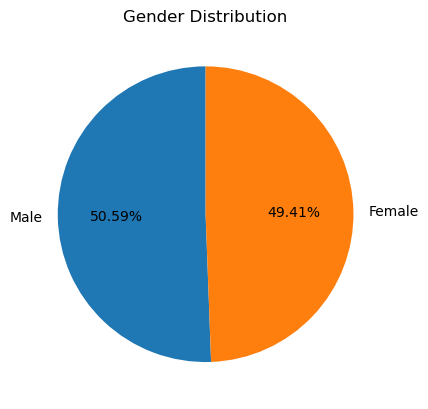

In [54]:
# Visualizing Gender

gender_counts = data['gender'].value_counts()
print(gender_counts)

plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.2f%%', startangle = 90)
plt.title('Gender Distribution')
plt.show()

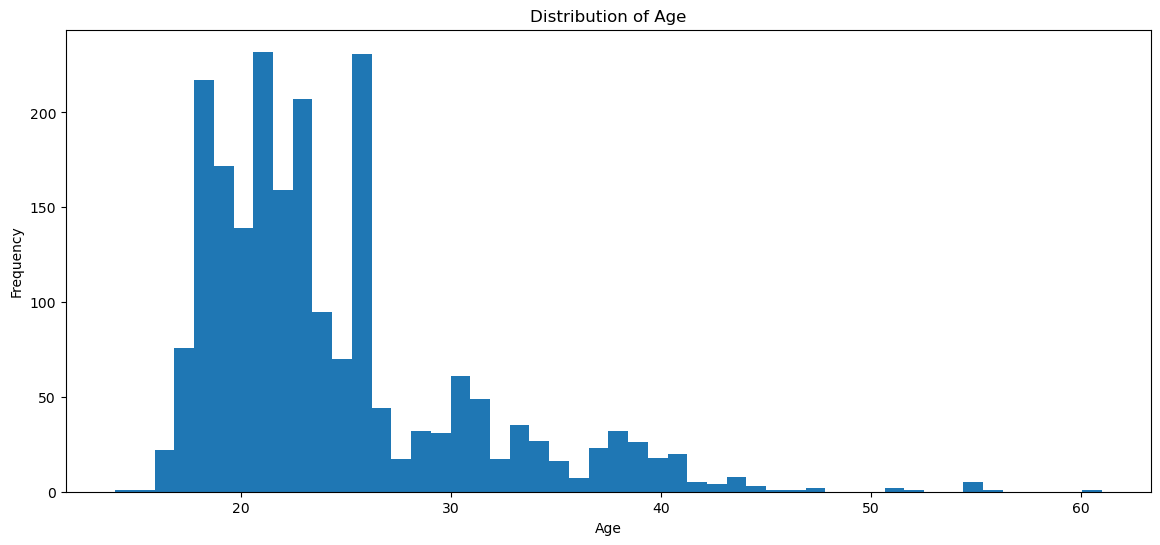

In [55]:
# Visualizing Age

plt.figure(figsize = (14, 6))
data['age'].plot(kind = 'hist', bins = 50)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

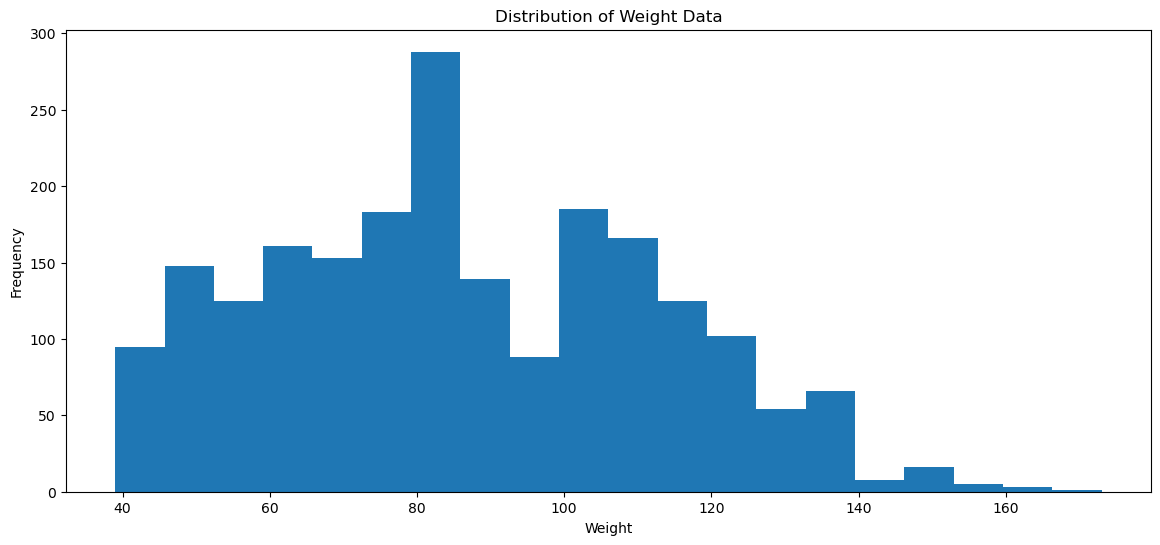

In [56]:
# Visualizing Weight data

plt.figure(figsize = (14, 6))
plt.hist(data['weight'], bins = 20)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Weight Data')
plt.show()

overweight_fam_hist
yes    1726
no      385
Name: count, dtype: int64


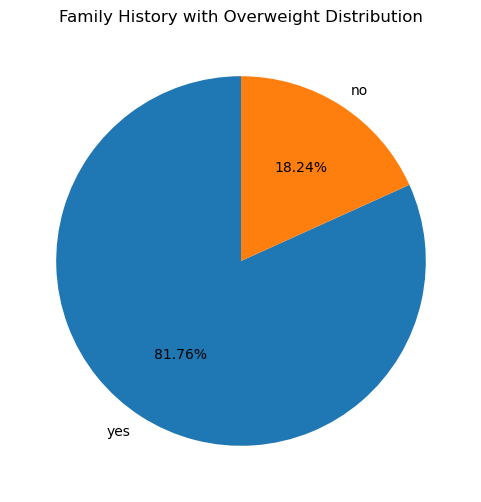

In [57]:
# Visualizing Family History with Obesity

fam_hist_counts = data['overweight_fam_hist'].value_counts()
print(fam_hist_counts)

plt.figure(figsize = (6, 6))
plt.pie(fam_hist_counts, labels = fam_hist_counts.index, autopct = '%1.2f%%', startangle = 90)
plt.title('Family History with Overweight Distribution')
plt.show()

f_high_caloric_food
yes    1866
no      245
Name: count, dtype: int64


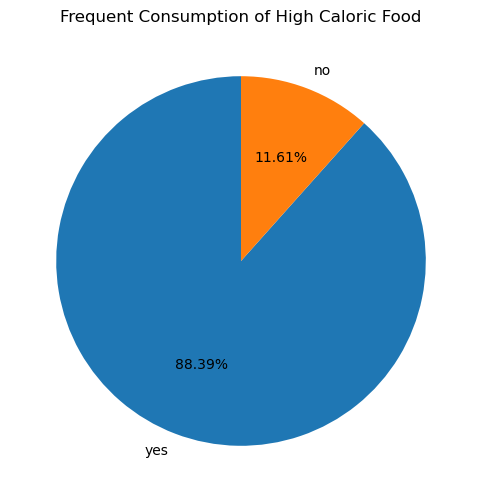

In [58]:
# Visualizing Frequent Consumption of High Caloric Food

FAVC_counts = data['f_high_caloric_food'].value_counts()
print(FAVC_counts)

plt.figure(figsize = (6, 6))
plt.pie(FAVC_counts, labels = FAVC_counts.index, autopct = '%1.2f%%', startangle = 90)
plt.title('Frequent Consumption of High Caloric Food')
plt.show()

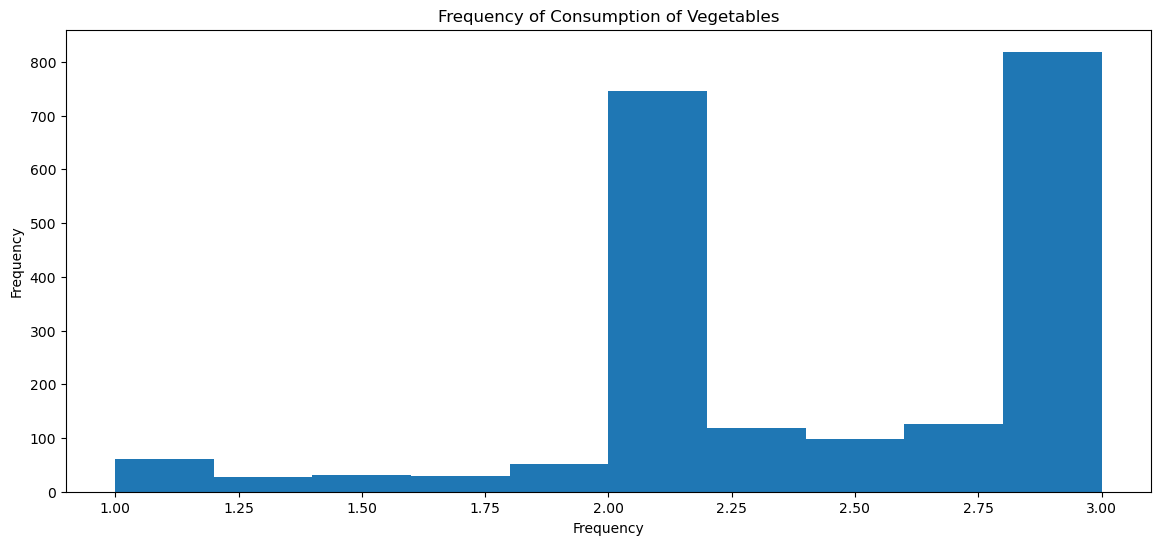

In [59]:
# Visualizing Frequency of Consumption of Vegetables

plt.figure(figsize = (14, 6))
plt.hist(data['f_vegetables'])
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency of Consumption of Vegetables')
plt.show()

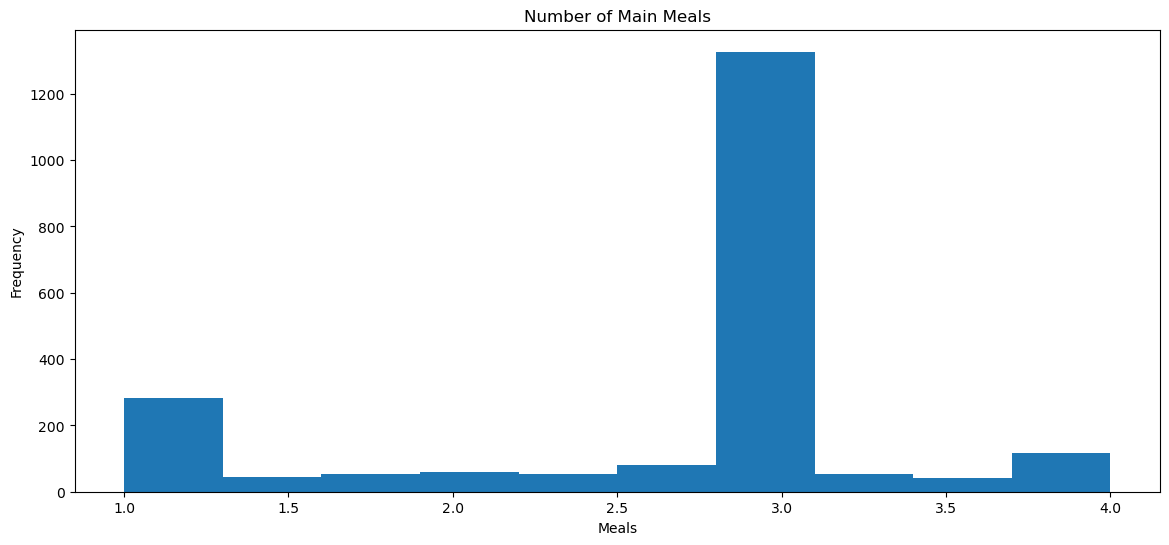

In [60]:
# Visualizing Number of Main Meals

plt.figure(figsize = (14, 6))
plt.hist(data['num_meals'])
plt.xlabel('Meals')
plt.ylabel('Frequency')
plt.title('Number of Main Meals')
plt.show()

food_between_meals
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64


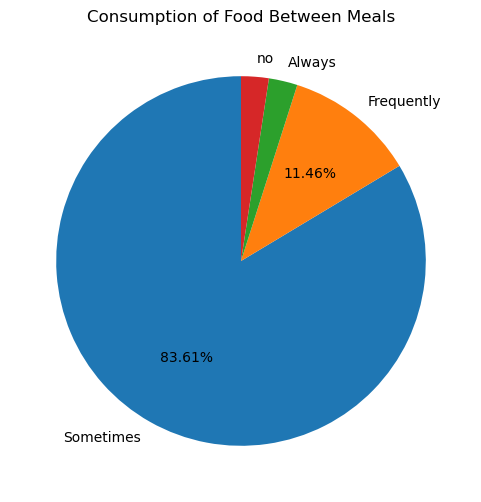

In [61]:
# Visualizing Consumption of Food Between Meals

CAEC_counts = data['food_between_meals'].value_counts()
print(CAEC_counts)

plt.figure(figsize = (6, 6))
plt.pie(CAEC_counts, labels = CAEC_counts.index, autopct = lambda pct: f'{pct:.2f}%' if pct > 5 else '', startangle = 90)
plt.title('Consumption of Food Between Meals')
plt.show()

smoke
no     2067
yes      44
Name: count, dtype: int64


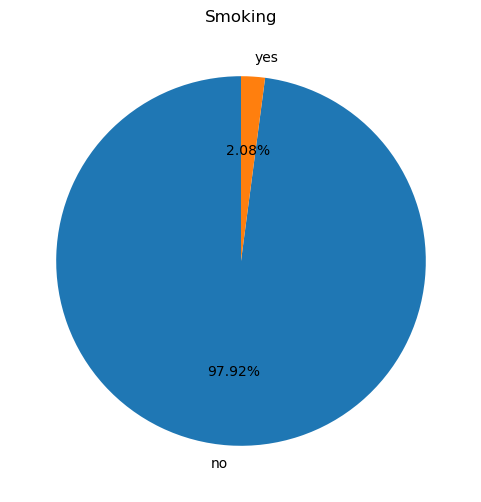

In [62]:
# Visualizing Smoking

smoke_counts = data['smoke'].value_counts()
print(smoke_counts)

plt.figure(figsize = (6, 6))
plt.pie(smoke_counts, labels = smoke_counts.index, autopct = '%1.2f%%', startangle = 90)
plt.title('Smoking')
plt.show()

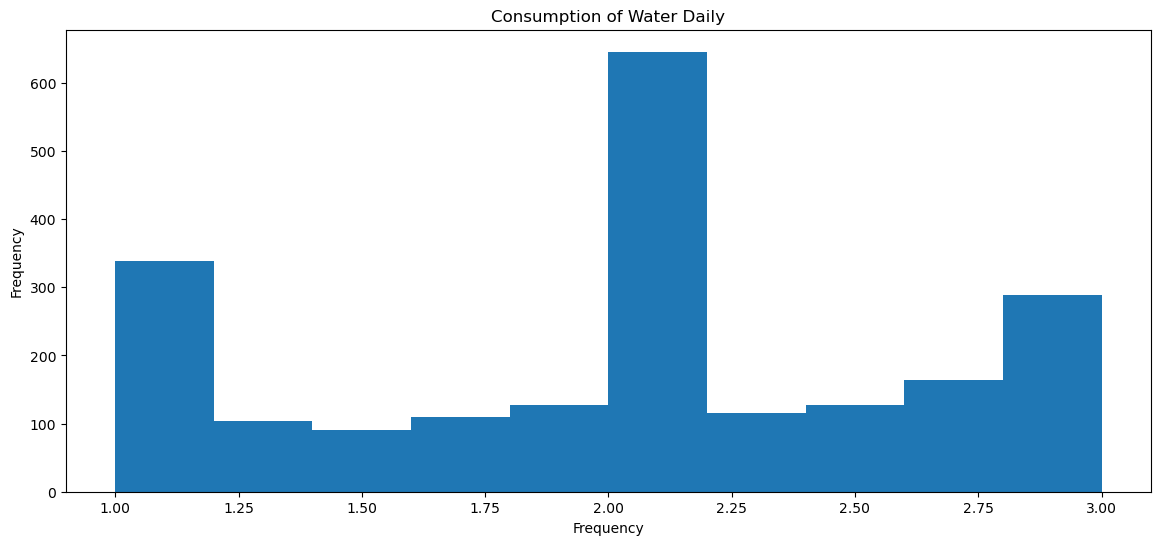

In [63]:
# Visualizing Consumption of Water Daily

plt.figure(figsize = (14, 6))
plt.hist(data['water_consumption'])
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Consumption of Water Daily')
plt.show()

calorie_conscious
no     2015
yes      96
Name: count, dtype: int64


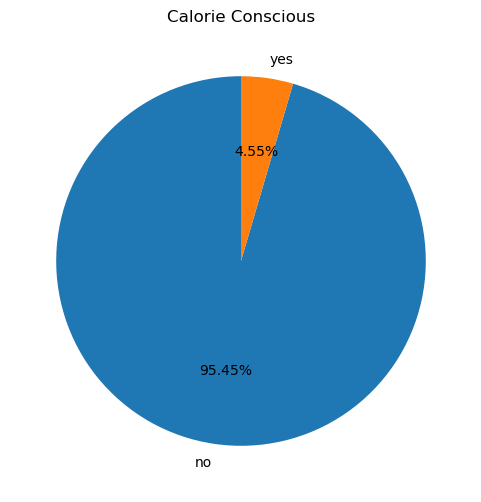

In [64]:
# Visualizing Calorie Consciousness

calorie_consciousness_counts = data['calorie_conscious'].value_counts()
print(calorie_consciousness_counts)

plt.figure(figsize = (6, 6))
plt.pie(calorie_consciousness_counts, labels = calorie_consciousness_counts.index, autopct = '%1.2f%%', startangle = 90)
plt.title('Calorie Conscious')
plt.show()

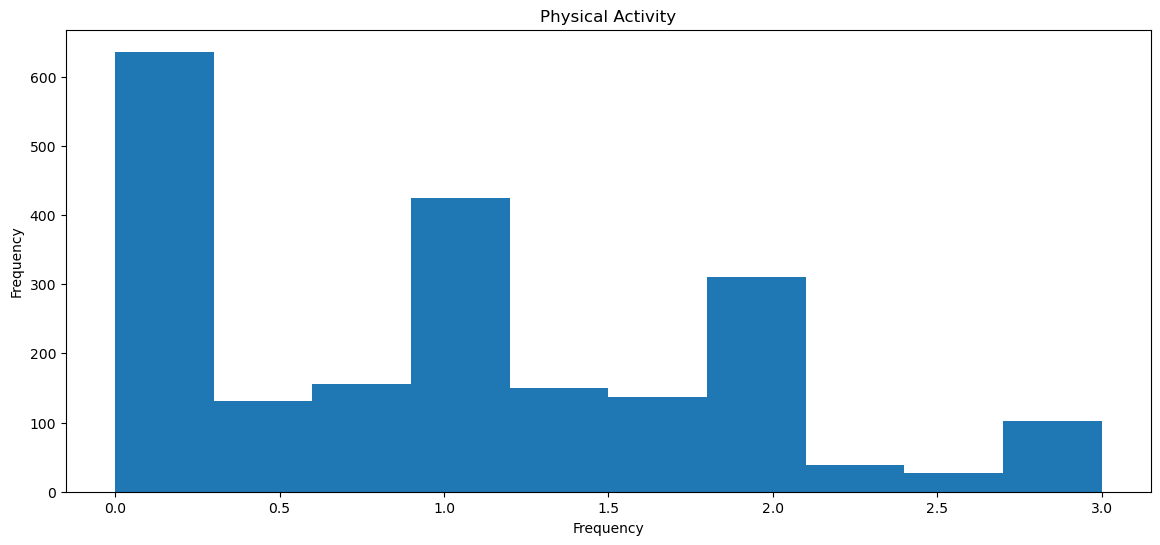

In [65]:
# Visualizing Physical Activity

plt.figure(figsize = (14, 6))
plt.hist(data['f_activity'])
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Physical Activity')
plt.show()

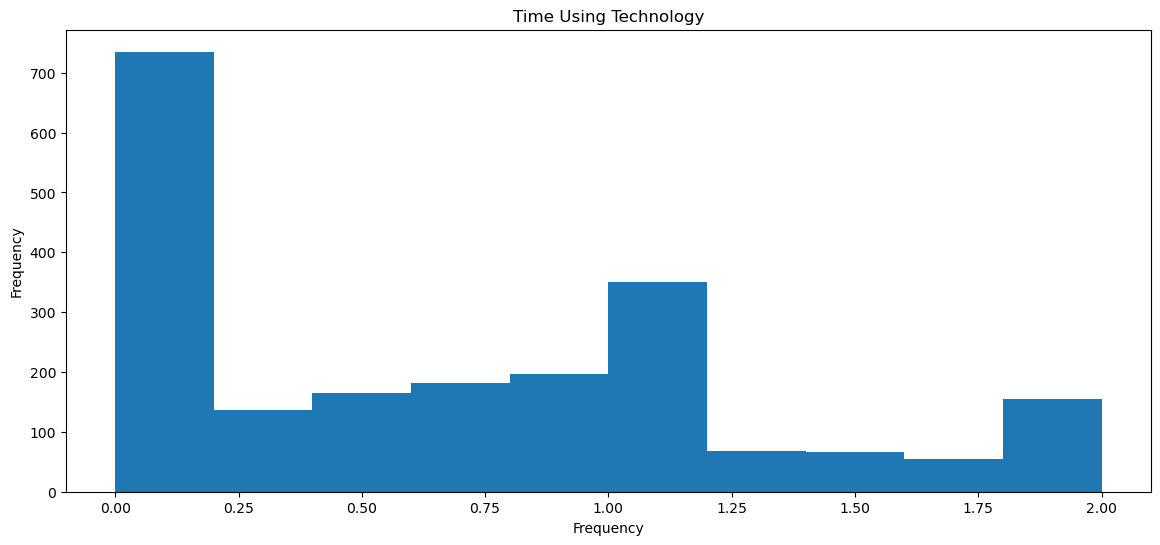

In [66]:
# Visualizing Time Using Technology

plt.figure(figsize = (14, 6))
plt.hist(data['time_on_tech'])
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Time Using Technology')
plt.show()

alcohol
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64


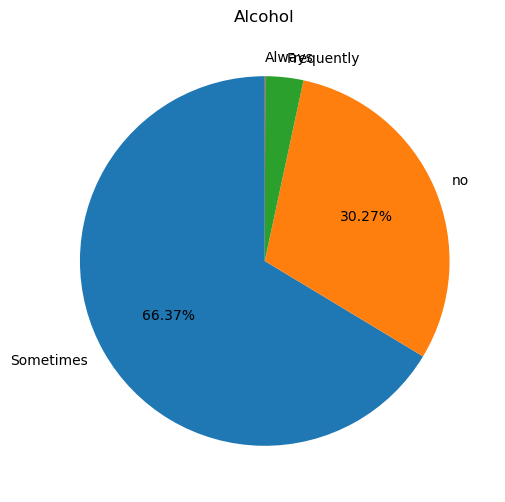

In [67]:
# Visualizing Calorie Consciousness

alcohol_counts = data['alcohol'].value_counts()
print(alcohol_counts)

plt.figure(figsize = (6, 6))
plt.pie(alcohol_counts, labels = alcohol_counts.index, autopct = lambda pct: f'{pct:.2f}%' if pct > 5 else '', startangle = 90)
plt.title('Alcohol')
plt.show()

transportation
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


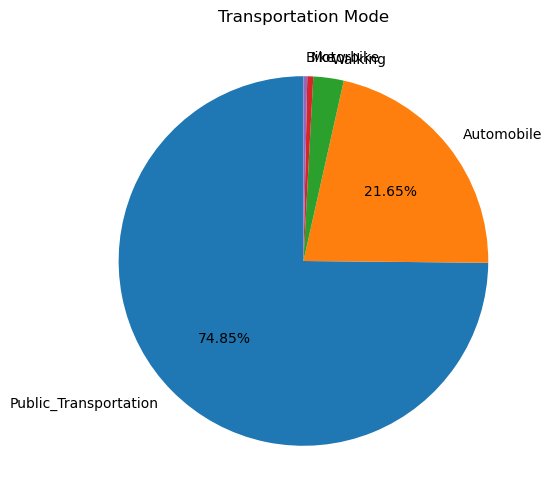

In [68]:
# Visualizing Calorie Consciousness

transportation_counts = data['transportation'].value_counts()
print(transportation_counts)

plt.figure(figsize = (6, 6))
plt.pie(transportation_counts, labels = transportation_counts.index, autopct = lambda pct: f'{pct:.2f}%' if pct > 5 else '', startangle = 90)
plt.title('Transportation Mode')
plt.show()

### Checking for Class Imbalance

Finally, it's worth looking at our class labels to make sure there isn't a class imbalance toward or away from any of our classes. As can be seen below, this was a non-issue for our dataset. With that in mind, we can rest assured that accuracy should be a reliable metric for measuring the performance of our model, as there's no class that could be entirely ignored without skewing our results noticeably.

obesity_level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


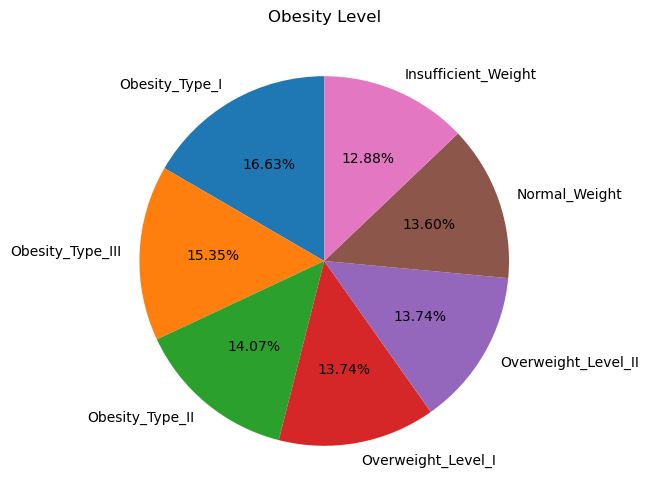

In [69]:
# Visualizing Obesity Levels

obesity_level_counts = data['obesity_level'].value_counts()
print(obesity_level_counts)

plt.figure(figsize = (6, 6))
plt.pie(obesity_level_counts, labels = obesity_level_counts.index, autopct = lambda pct: f'{pct:.2f}%' if pct > 5 else '', startangle = 90)
plt.title('Obesity Level')
plt.show()

# Data Preperation

Here we will begin preparing the data. The data is already relatively cleaned since we had checked prior to find any missing values in a previous code cell. However, we wanted to either factorize or one-hot-encode some of the features. Below is where we start doing such. <br>

* We one-hot-encoded transportation. 
* Meanwhile we decided to turn the below features from string values to binary values:
    * overweight_fam_hist
    * f_high_caloric_food
    * calorie_conscious
    * smoke
    * gender
* Afterwards, we thought that factorizing the below features was a good idea since they were in a string scale of "never", "sometimes", "always", etc.:
    * food_between_meals
    * alcohol
* Finally, we factorized the obesity_level label since it was also on a similar string scale

In [70]:
# Encode n-value non-numaric values into an n-feature encoding
encoded = pd.get_dummies(data, columns = ['transportation'], dtype = 'int32') 

# Encode binary non-numeric values into a single-feature encoding
encoded = pd.get_dummies(encoded, columns = ['overweight_fam_hist', 'f_high_caloric_food', 'calorie_conscious', 'smoke', 'gender'], drop_first = True, dtype = 'int32')

# Encode certain categorical features as integer
encoded['food_between_meals'], uniques = encoded['food_between_meals'].factorize()
encoded['alcohol'], uniques = encoded['alcohol'].factorize()

# Convert the label to an integer
encoded['obesity_level'], label_conversion = encoded['obesity_level'].factorize()
# encoded = data
encoded.head()


,age,height,weight,f_vegetables,num_meals,food_between_meals,water_consumption,f_activity,time_on_tech,alcohol,...,transportation_Automobile,transportation_Bike,transportation_Motorbike,transportation_Public_Transportation,transportation_Walking,overweight_fam_hist_yes,f_high_caloric_food_yes,calorie_conscious_yes,smoke_yes,gender_Male
0,21.0,1.62,64.0,2.0,3.0,0,2.0,0.0,1.0,0,...,0,0,0,1,0,1,0,0,0,0
1,21.0,1.52,56.0,3.0,3.0,0,3.0,3.0,0.0,1,...,0,0,0,1,0,1,0,1,1,0
2,23.0,1.80,77.0,2.0,3.0,0,2.0,2.0,1.0,2,...,0,0,0,1,0,1,0,0,0,1
3,27.0,1.80,87.0,3.0,3.0,0,2.0,2.0,0.0,2,...,0,0,0,0,1,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,0,2.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,1


***
Now that we have factorized and one-hot-encoded the non-integer features, we want to standardize all the features (except for the label)

In [71]:
labelless = encoded.drop(['obesity_level'], axis = 1)
labels = encoded['obesity_level']
numpy_array_data = StandardScaler().fit_transform(labelless)

scaled_data = pd.DataFrame(numpy_array_data, columns = labelless.columns)

scaled_data.head()

,age,height,weight,f_vegetables,num_meals,food_between_meals,water_consumption,f_activity,time_on_tech,alcohol,transportation_Automobile,transportation_Bike,transportation_Motorbike,transportation_Public_Transportation,transportation_Walking,overweight_fam_hist_yes,f_high_caloric_food_yes,calorie_conscious_yes,smoke_yes,gender_Male
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.386951,-0.013073,-1.188039,0.561997,-1.419172,-0.525642,-0.05768,-0.072375,0.579721,-0.165078,0.472291,-2.759769,-0.218272,-0.145900,-1.011914
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,-0.386951,1.618759,2.339750,-1.080625,0.521160,-0.525642,-0.05768,-0.072375,0.579721,-0.165078,0.472291,-2.759769,4.581439,6.853997,-1.011914
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.386951,-0.013073,1.163820,0.561997,2.461491,-0.525642,-0.05768,-0.072375,0.579721,-0.165078,0.472291,-2.759769,-0.218272,-0.145900,0.988227
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.386951,-0.013073,1.163820,-1.080625,2.461491,-0.525642,-0.05768,-0.072375,-1.724969,6.057758,-2.117337,-2.759769,-0.218272,-0.145900,0.988227
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.386951,-0.013073,-1.188039,-1.080625,0.521160,-0.525642,-0.05768,-0.072375,0.579721,-0.165078,-2.117337,-2.759769,-0.218272,-0.145900,0.988227


Let's check the mean

In [72]:
scaled_data.mean()

age                                     0.000000e+00
height                                 -5.385449e-16
weight                                 -5.385449e-16
f_vegetables                           -1.346362e-17
num_meals                               4.964711e-16
food_between_meals                      5.385449e-17
water_consumption                       1.077090e-16
f_activity                              2.692725e-17
time_on_tech                           -1.346362e-17
alcohol                                 5.048859e-17
transportation_Automobile              -5.890335e-17
transportation_Bike                    -1.009772e-17
transportation_Motorbike                2.019544e-17
transportation_Public_Transportation    6.731812e-17
transportation_Walking                  0.000000e+00
overweight_fam_hist_yes                -8.078174e-17
f_high_caloric_food_yes                 1.346362e-16
calorie_conscious_yes                  -6.731812e-17
smoke_yes                              -2.0195

...and the standard deviation too!

In [73]:
scaled_data.std()

age                                     1.000237
height                                  1.000237
weight                                  1.000237
f_vegetables                            1.000237
num_meals                               1.000237
food_between_meals                      1.000237
water_consumption                       1.000237
f_activity                              1.000237
time_on_tech                            1.000237
alcohol                                 1.000237
transportation_Automobile               1.000237
transportation_Bike                     1.000237
transportation_Motorbike                1.000237
transportation_Public_Transportation    1.000237
transportation_Walking                  1.000237
overweight_fam_hist_yes                 1.000237
f_high_caloric_food_yes                 1.000237
calorie_conscious_yes                   1.000237
smoke_yes                               1.000237
gender_Male                             1.000237
dtype: float64

***
Okay now that everything is standardized, we are going to compare the the correlations between features in a matrix graph. We ideally wanted to just render the label (obesity_level) vs. every other feature but we don't know how to do that so the entire matrix is drawn (but that's okay!). The graph is very large so we seperated it into two graphs.

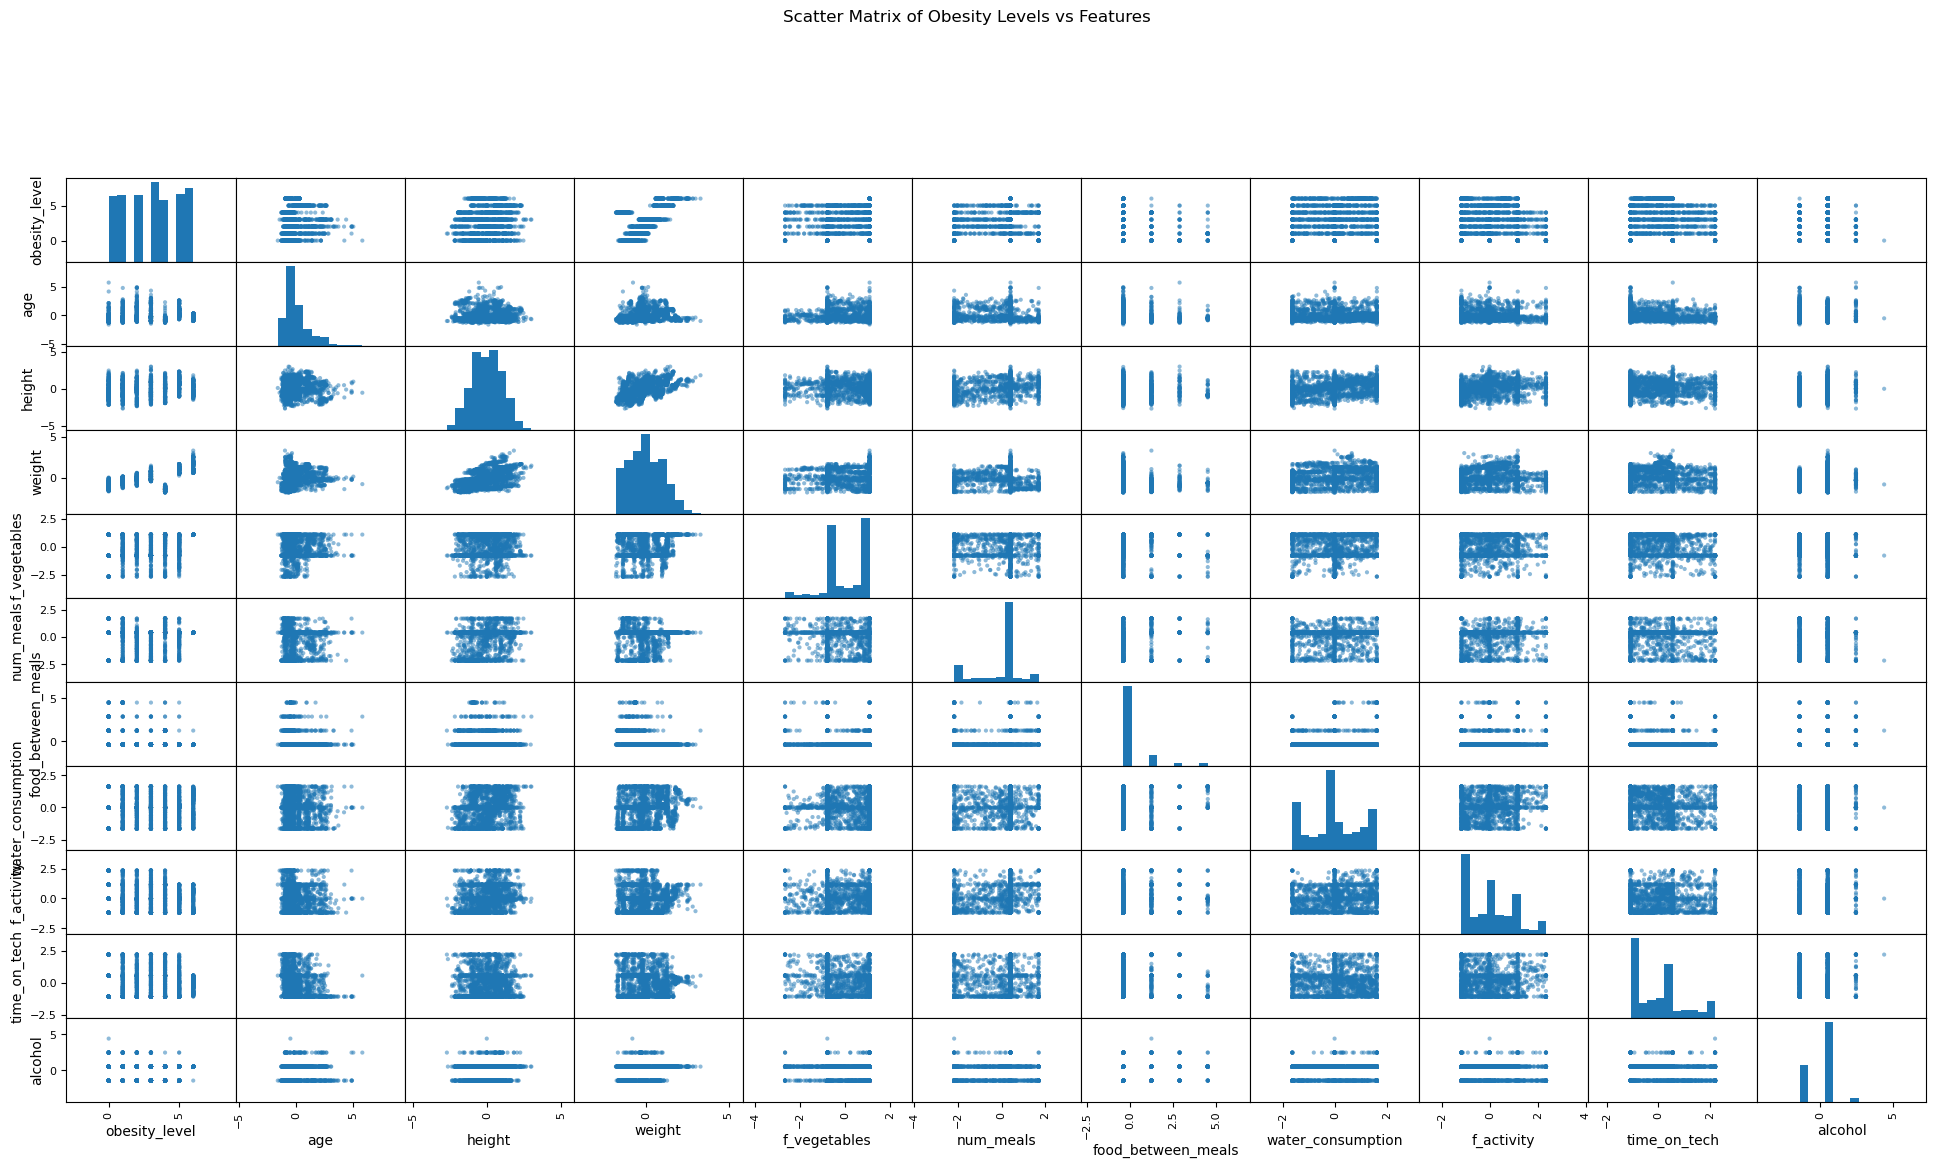

In [74]:
# scatter plot matrix
scaled_data.insert(10, "obesity_level", encoded['obesity_level'])
nonencoded_cols = scaled_data[['obesity_level', 'age', 'height', 'weight', 'f_vegetables', 'num_meals', 'food_between_meals', 'water_consumption', 'f_activity', 'time_on_tech', 'alcohol']]

pd.plotting.scatter_matrix(pd.concat([nonencoded_cols], axis = 1),figsize = (24, 12), range_padding = 1)
plt.suptitle(f'Scatter Matrix of Obesity Levels vs Features', y = 1.02)
plt.show()

Here's the second graph, as promised. <br>
Okay so what we have concluded is that the second graph is impossible to interpret. The first graph too, for some features at least. However, there are some feature correlations like obesity_level vs weight (wow who wouldve thought lol) and weight vs. height.

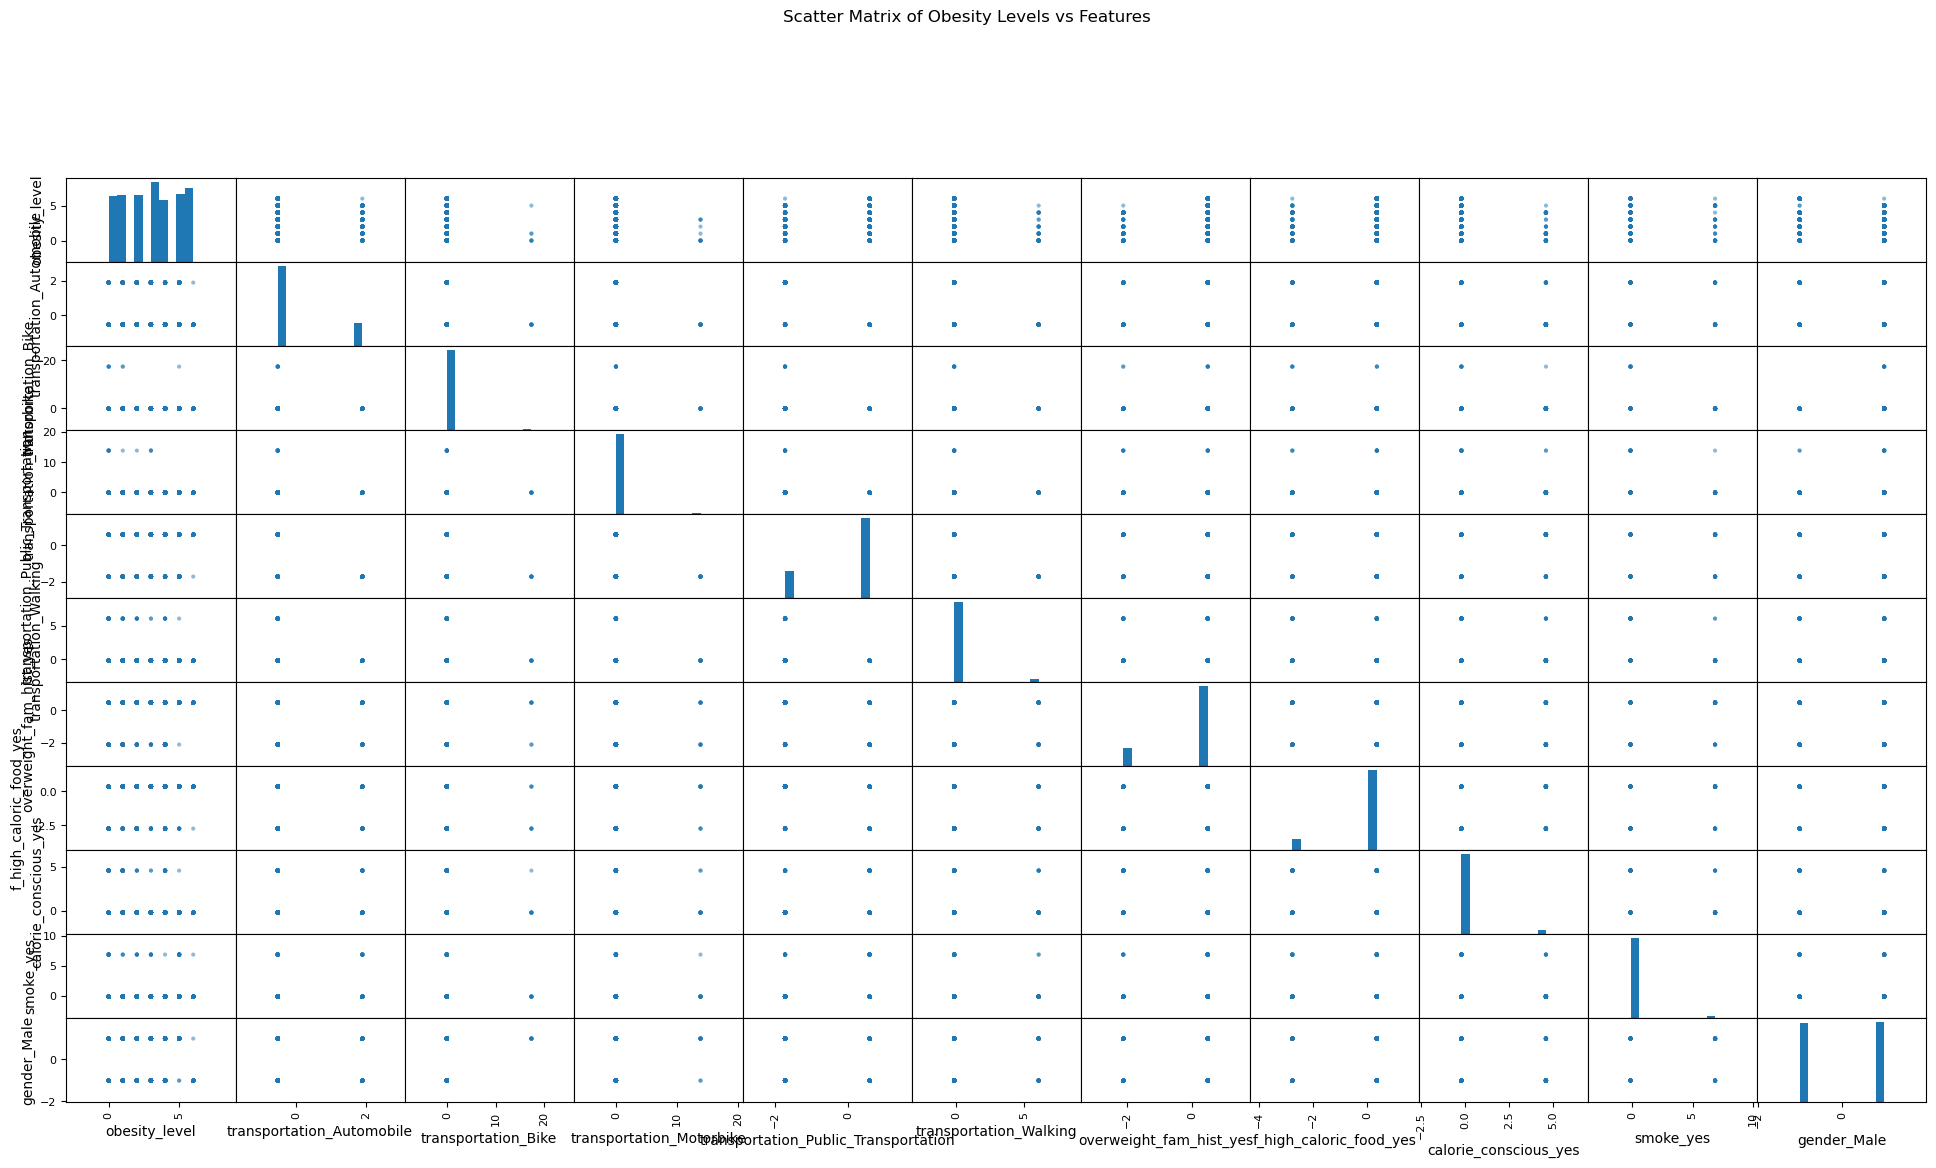

In [75]:
encoded_cols = scaled_data.drop(['age', 'height', 'weight', 'f_vegetables', 'num_meals', 'food_between_meals', 'water_consumption', 'f_activity', 'time_on_tech', 'alcohol'], axis = 1)

pd.plotting.scatter_matrix(pd.concat([encoded_cols], axis = 1),figsize = (24, 12), range_padding = 1)
plt.suptitle(f'Scatter Matrix of Obesity Levels vs Features', y = 1.02)
plt.show()

Since the second graph is virtually uninterpretable, we'll print the correlation values numerically. Perhaps it will give us better insight... <br>
suprisingly it did. We were also suprised on how f_vegetables had a relatively high correlation with obesity_levels. On second thought, that actually makes quite a bit of sense...

In [76]:
print(encoded.corr()['obesity_level'].sort_values(ascending = False))

obesity_level                           1.000000
weight                                  0.634348
f_vegetables                            0.343951
overweight_fam_hist_yes                 0.275149
f_high_caloric_food_yes                 0.221948
transportation_Public_Transportation    0.161921
num_meals                               0.157947
height                                  0.137662
alcohol                                 0.096623
age                                     0.084565
water_consumption                       0.070423
smoke_yes                              -0.030298
time_on_tech                           -0.034355
transportation_Bike                    -0.059284
transportation_Motorbike               -0.071090
transportation_Automobile              -0.083684
gender_Male                            -0.131605
f_activity                             -0.142211
calorie_conscious_yes                  -0.169642
transportation_Walking                 -0.169668
food_between_meals  

***
Here is where we compare the correlations between features (excluding obesity_level). The reason we wanted to do this is because we wanted to see if it possible to perform a PCA reduction. The answer is yes.

In [77]:
# Check for highly correlated features, positively or negatively
correlation_matrix = encoded.drop('obesity_level', axis = 1).corr()
print('\n')

encoded_cols = ['age', 'height', 'weight', 'f_vegetables', 'num_meals', 'food_between_meals', 'water_consumption', 'f_activity', 'time_on_tech', 'alcohol']

for column in encoded_cols:
    print(column)
    print(correlation_matrix[column].nlargest(n=3)[1:])
    print(correlation_matrix[column].nsmallest(n=2))
    print('\n')



age
transportation_Automobile    0.604683
overweight_fam_hist_yes      0.205725
Name: age, dtype: float64
transportation_Public_Transportation   -0.554448
time_on_tech                           -0.296931
Name: age, dtype: float64


height
gender_Male    0.618466
weight         0.463136
Name: height, dtype: float64
calorie_conscious_yes   -0.133753
food_between_meals      -0.133042
Name: height, dtype: float64


weight
overweight_fam_hist_yes    0.496820
height                     0.463136
Name: weight, dtype: float64
food_between_meals      -0.325981
calorie_conscious_yes   -0.201906
Name: weight, dtype: float64


f_vegetables
weight                   0.216125
calorie_conscious_yes    0.071852
Name: f_vegetables, dtype: float64
gender_Male    -0.274505
time_on_tech   -0.101135
Name: f_vegetables, dtype: float64


num_meals
height        0.243672
f_activity    0.129504
Name: num_meals, dtype: float64
food_between_meals                     -0.071833
transportation_Public_Transportation

Okay! Let's PCA starting with a generous .9 as our n_compnents value

In [78]:
pca_data = PCA(n_components = .9, svd_solver = 'full')
numpy_array_data = pca_data.fit_transform(scaled_data)
pca_data = pd.DataFrame(numpy_array_data)
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.219543,-1.175682,0.471259,-0.682630,-1.283064,0.238014,-0.178508,1.161158,0.625683,-0.386688,0.315724,-1.786853,1.223005,-1.585213,-0.628359
1,3.726550,-1.341473,0.238704,4.493799,2.217296,-2.477344,-0.538011,3.550059,3.451333,-4.832088,-1.021034,-0.654056,0.399280,-0.617609,-0.082076
2,2.761820,0.284617,-2.311067,0.487644,0.818244,-0.661753,-0.389146,-0.179285,0.914888,0.160691,0.619611,-2.118805,-0.269966,-0.579714,-2.266063
3,2.673248,1.478569,-1.045064,4.488660,-0.617870,-2.817962,-1.143613,0.295415,-0.897575,4.341863,0.092710,-2.043065,-1.362389,0.428047,-1.016261
4,1.599179,-0.660916,-0.051245,-0.000878,1.386423,0.618122,-0.054869,0.565045,0.194428,1.785029,-1.401783,-0.694775,-1.149501,-1.181578,-2.666098


Perfect, we've gone from about 20 features to now 14! Let's see the matrix correlation between these features.<br><br>

They don't look too strong if we are being honest... Hopefully it doesn't affect our model.

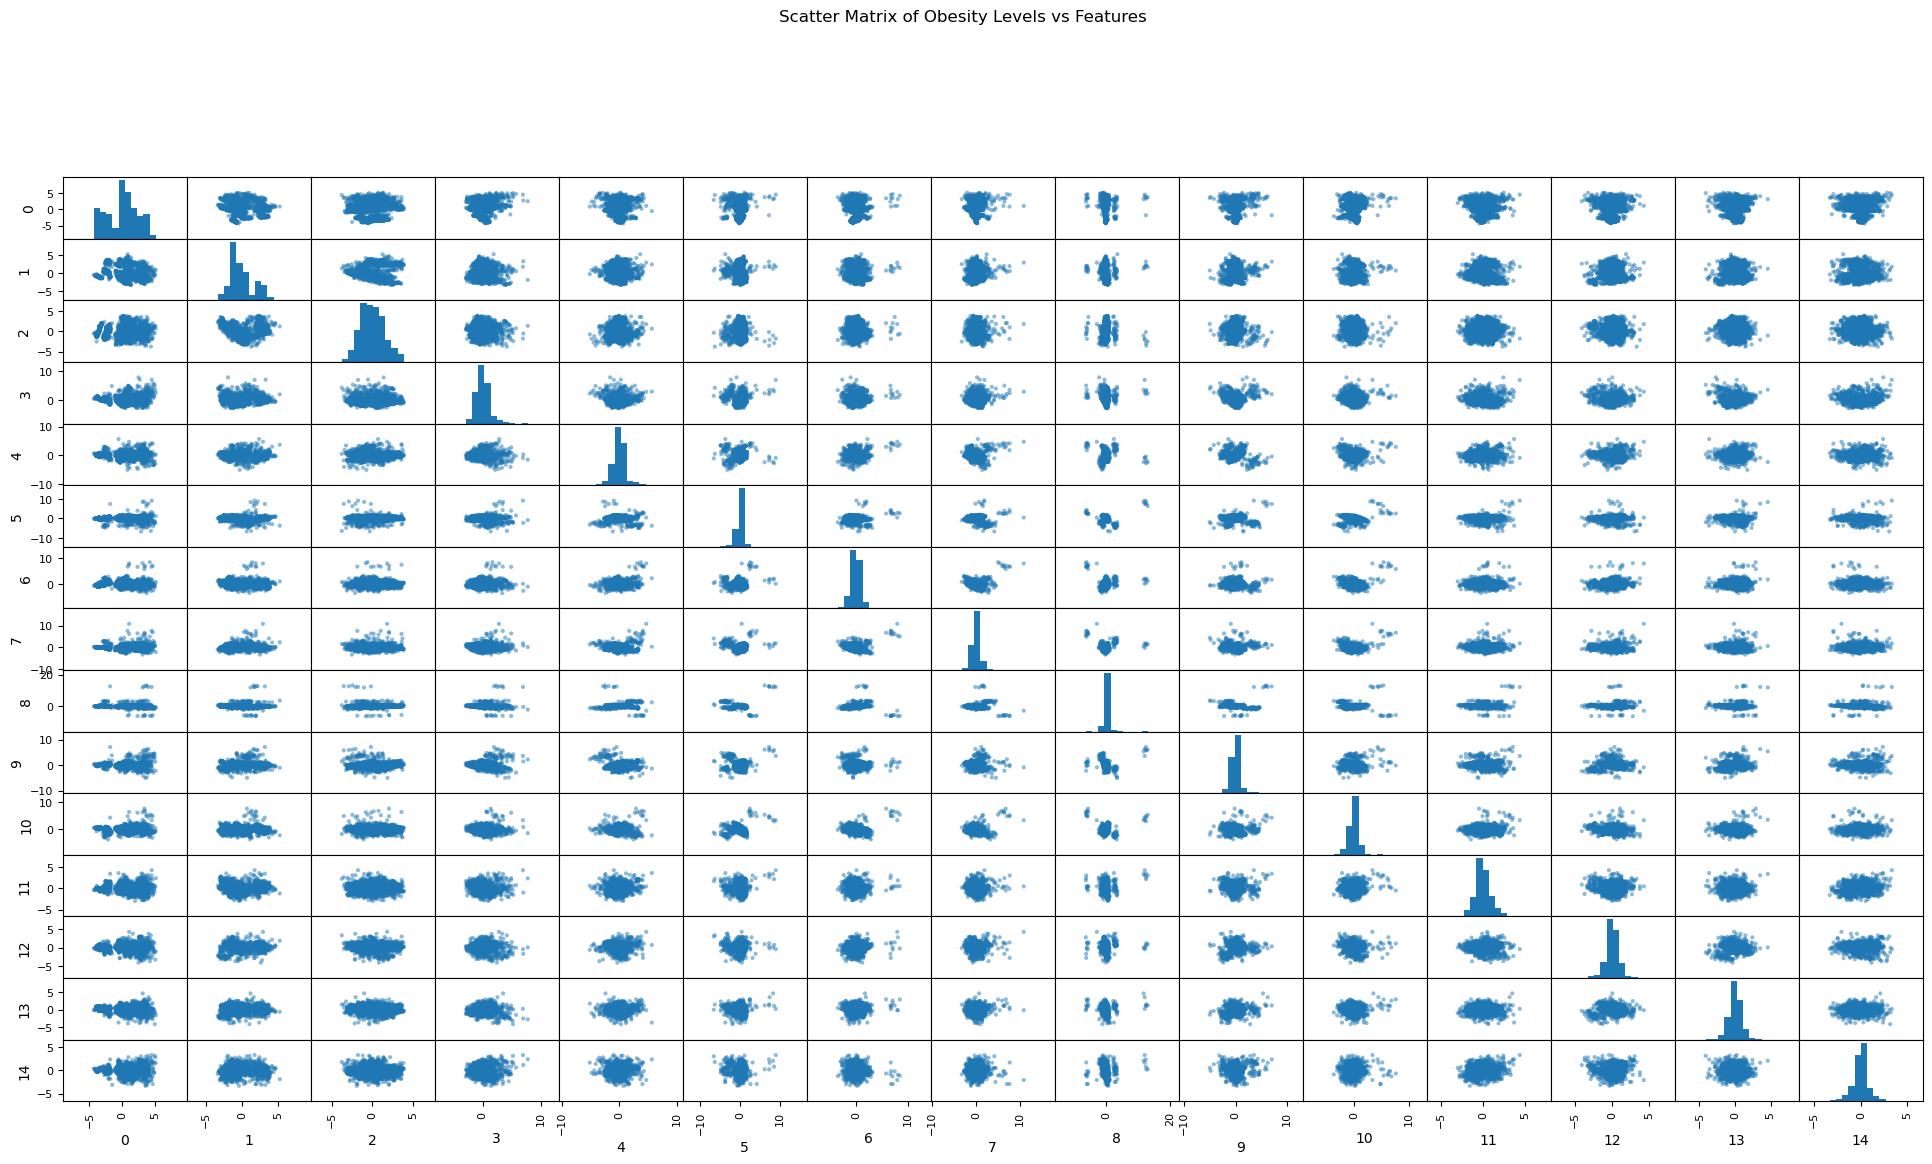

In [79]:
pd.plotting.scatter_matrix(pd.concat([pca_data], axis = 1),figsize = (24, 12), range_padding = 1)
plt.suptitle(f'Scatter Matrix of Obesity Levels vs Features', y = 1.02)
plt.show()

# Modeling

Now that we've verified the integrity of our data and investigated some manipulations, we need to train actual models to predict obesity level, and to see which seems to produce the best output. We'll start right off the bat by testing all of our models with arbitrary hyperparametrs and a 5-fold cross-validation, and then we'll tune the most promising model further to see how good our estimate can get.

In [80]:
scaler = StandardScaler()
pca_reduction = PCA(n_components = .95, svd_solver = 'full')

### Linear Regression

The first model we'll try is a linear regression. While this might not seem like the most obvious model to run for this problem, but we were interested in investigation the correlation between weight and obesity level to see if we can create a relatively low-cost and simple model for this problem.

In [81]:
linear_regression = LinearRegression()

regression_features = labelless['weight'].array.reshape(-1, 1)

pipelined_regression = Pipeline([("scale", scaler), ("pca", pca_reduction), ("knn", linear_regression)])
fold_accuracies = cross_val_score(pipelined_regression, regression_features, labels)

print(fold_accuracies)
print(fold_accuracies.sum() / len(fold_accuracies))

[ -0.86483539  -2.43329257  -3.18704297   0.54413409 -25.22685678]
-6.233578725576935


And apparently we cannot at all. Not only does only utilizing the weight feature not make a good model, but only a single one of the folds tested above actually had a positive R^2 value at all. Not only was a linear regression not an optimal solution, but it's seemingly worse than always guessing the class label of the average data value.

### Decision Tree

With that in mind, we turn to the simplest model we've covered: Decision Trees.

In [82]:
decision_tree = DecisionTreeClassifier()

pipelined_regression = Pipeline([("scale", scaler), ("pca", pca_reduction), ("knn", decision_tree)])
fold_accuracies = cross_val_score(pipelined_regression, labelless, labels)

print(fold_accuracies)
print(fold_accuracies.sum() / len(fold_accuracies))

[0.54137116 0.69668246 0.72511848 0.69668246 0.79146919]
0.6902647530055013


As can be seen above, this was much more effective than our negative-R^2 regression attempt, with a respectable accuracy of around 70% without any attempts to tune the tree's depth. We'll keep that in mind for later, but first we want to give a couple other models a basic glance-over.

### Ensembling

If one decision tree is ok at predicting obesity levels, how good would multiple trees be? Specifically, we'll attempt to compound our successes (and vote out our failures) with a random forest calssifier.

In [83]:
decision_tree = RandomForestClassifier()

pipelined_regression = Pipeline([("scale", scaler), ("pca", pca_reduction), ("knn", decision_tree)])
fold_accuracies = cross_val_score(pipelined_regression, labelless, labels)

print(fold_accuracies)
print(fold_accuracies.sum() / len(fold_accuracies))

[0.59338061 0.84834123 0.89810427 0.86255924 0.89810427]
0.8200979238793094


And--as one would expect--the random forest increased upon the performance of the singular decision tree, raising our accuracy to around 80%. This seems promising, but we did say we'd attempt one other model before selecting one for tuning.

### Neural Nets
```
"When in doubt: Neural net it out." 
    ~Someone at some point, probably.
```

Neural networks have a reputation as a one-size-fits-all solution to any machine learning problem, and we wanted to try to have first-hand expirence that we could call upon when considering that steryotype. Furthermore, as neural networks are good for general-purpose function-approximation, we should be able to train a model that approximates the function of determining the obesity level of a persion with given traits is.

In [84]:
def try_neural_net():
    linear_regression = MLPClassifier()

    pipelined_regression = Pipeline([("scale", scaler), ("pca", pca_reduction), ("knn", linear_regression)])
    fold_accuracies = cross_val_score(pipelined_regression, labelless, labels)

    print("Fold Accuracies", fold_accuracies)
    print("Mean: ", fold_accuracies.mean())
    return fold_accuracies.mean()

with warnings.catch_warnings(action="ignore"):
    try_neural_net()

Fold Accuracies [0.56264775 0.86018957 0.86255924 0.86966825 0.9028436 ]
Mean:  0.8115816835288451


And we weren't disapointed, our neural net matched the performance of the random forest (though, of course, we have optimized neither yet). That gives us a pretty clear target for further testing and tuning: A decision tree based approach and a neural net based one.


# Tuning

Since the neural network and random forest performed best, we decided to tune those models. We will make the n_components our hyperparameter.

In [85]:
def evaluate_neural_net(variation):
    scaler = StandardScaler()
    pca_reduction = PCA(n_components=variation, svd_solver='full')
    linear_regression = MLPClassifier()

    pipelined_regression = Pipeline([("scale", scaler), ("pca", pca_reduction), ("knn", linear_regression)])
    fold_accuracies = cross_val_score(pipelined_regression, labelless, labels)

    print("Fold Accuracies", fold_accuracies)
    print(f"Average accuracy for {var} components:", fold_accuracies.mean())

    return fold_accuracies.mean()

Now we shall run it with n_components values from 0.80 to 0.99, jumping at 0.01 intervals. And while we are at it, might as well just run it at n_components = 1 to see what happens.

In [86]:
accuracies = []
with warnings.catch_warnings(action="ignore"):
    for var in range(1, 20):
        accuracies.append(evaluate_neural_net(var / 100 + 0.80))
with warnings.catch_warnings(action="ignore"):
    accuracies.append(evaluate_neural_net(1))

Fold Accuracies [0.54137116 0.81516588 0.78909953 0.81753555 0.84123223]
Average accuracy for 1 components: 0.760880866749577
Fold Accuracies [0.56028369 0.81516588 0.79146919 0.83649289 0.84597156]
Average accuracy for 2 components: 0.7698766428019226
Fold Accuracies [0.56501182 0.82227488 0.80094787 0.82227488 0.83886256]
Average accuracy for 3 components: 0.7698744019808859
Fold Accuracies [0.54846336 0.81753555 0.8056872  0.84597156 0.83175355]
Average accuracy for 4 components: 0.7698822448545147
Fold Accuracies [0.55319149 0.82227488 0.7985782  0.81042654 0.84597156]
Average accuracy for 5 components: 0.7660885348391651
Fold Accuracies [0.54846336 0.83412322 0.81279621 0.81516588 0.85781991]
Average accuracy for 6 components: 0.7736737140488275
Fold Accuracies [0.55319149 0.82938389 0.81042654 0.83175355 0.86729858]
Average accuracy for 7 components: 0.7784108097206818
Fold Accuracies [0.55555556 0.83175355 0.82227488 0.82464455 0.83649289]
Average accuracy for 8 components: 0.77

That was a lot of text that we didn't want to strain our eyes trying to read. Let's graph it!

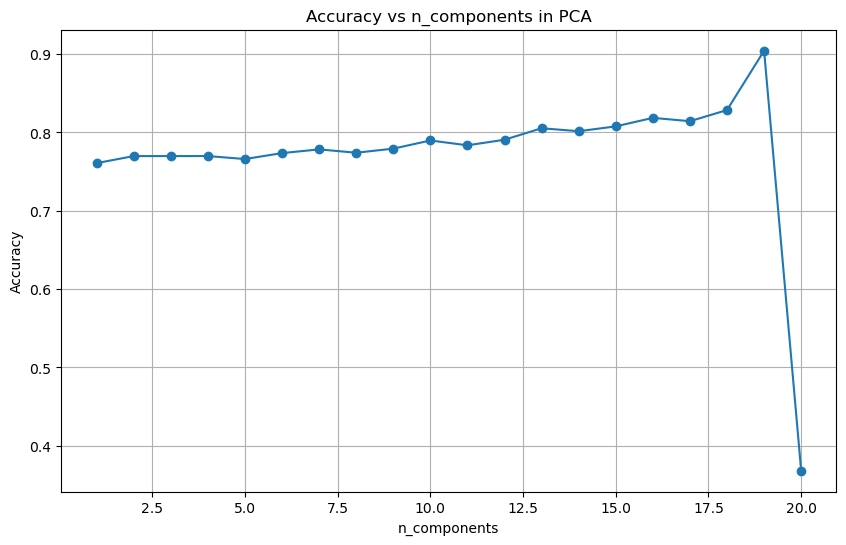

In [87]:
# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel('n_components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_components in PCA')
plt.grid(True)
plt.show()

Apparently, an n_components of 0.99 yielded the highest accuracies. In fact, the accuracy seems to be relatively improving as n_components went up. If it were not for the fact that we messed around and decided to run an n_components of 1, we wouldve assumed that accuracy directly increases as n_components increased.

# Finalizing

Okay let's run the neural net with a n_component of .99 and call it a day!

In [88]:
with warnings.catch_warnings(action="ignore"):
    evaluate_neural_net(.99)

Fold Accuracies [0.68085106 0.96445498 0.9549763  0.96682464 0.97867299]
Average accuracy for 19 components: 0.9091559947564788
